# Overview of RDkit
## Pip installation requirements

!pip install rdkit-pypi pandas seaborn mols2grid requests

In [21]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools
import mols2grid
import requests
import os


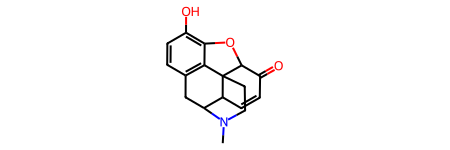

In [16]:
# Creating molecules from smiles
mol_list = ['CN1CCC23C4C1CC5=C2C(=C(C=C5)O)OC3C(=O)C=C4', 
            'CC(=O)OC1=CC=CC=C1C(=O)O',
            'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O',
            'CC(=O)NC1=CC=C(C=C1)O']
mol = Chem.MolFromSmiles(mol_list[0])
mol

    

In [61]:
#Pat Walters ligands
url = url = "https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/main/data/example_compounds.sdf"
r = requests.get(url)
bytes_written = open('example_compounds.sdf', 'w').write(r.text)

mols = [x for x in Chem.SDMolSupplier("example_compounds.sdf")]
mols = mols[:4]

Draw.MolsToGridImage(mols,molsPerRow=4,useSVG=True) 
mols2grid.display(mols, legends=[mol.GetProp("_Name") for mol in mols], molsPerRow=4)

MolGridWidget()

In [53]:
#Get molecules in sdf format from pubchem. Only donwloads molecules indvidually. 
def get_mols_from_pubchem(compound_names):
    directory = 'sdf_files'
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    file_names = []
    for compound_name in compound_names:
        url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{compound_name}/SDF'
        response = requests.get(url)
        with open(os.path.join(directory, f'{compound_name}.sdf'), 'w') as f:
            f.write(response.text)
        file_names.append(os.path.join(directory, f'{compound_name}.sdf'))
    return file_names

compound_names = ['Morphine', 'Aspirin', 'Ibuprofen', 'Acetaminophen']
pain_compounds = get_mols_from_pubchem(compound_names)

In [59]:
mols = [Chem.MolFromMolFile(x) for x in pain_compounds]
mols
Draw.MolsToGridImage(mols,molsPerRow=4,useSVG=True, legends=compound_names)

mols2grid.display(mols, legends=compound_names)

MolGridWidget()

In [68]:
#Keeps track of the selected ligands
mols2grid.get_selection()

selected_ligands = mols2grid.get_selection()
selected_ligands

{3: 'CC(=O)Nc1ccc(O)cc1', 1: 'CC(=O)Oc1ccccc1C(=O)O'}

In [84]:
df = PandasTools.LoadSDF('sdf_files/Morphine.sdf')
df_2 = PandasTools.LoadSDF('example_compounds.sdf') 

Failed to patch pandas - unable to change molecule rendering
Failed to patch pandas - unable to change molecule rendering


,ID,ROMol
0,168691 CHEMBL318804,<rdkit.Chem.rdchem.Mol object at 0x128ac6490>
1,86358 CHEMBL162,<rdkit.Chem.rdchem.Mol object at 0x128ac6960>
2,575087 CHEMBL576683,<rdkit.Chem.rdchem.Mol object at 0x12b157df0>
3,575065 CHEMBL571484,<rdkit.Chem.rdchem.Mol object at 0x12b1ec3c0>
4,575047 CHEMBL568937,<rdkit.Chem.rdchem.Mol object at 0x12b1ec430>
5,575012 CHEMBL571056,<rdkit.Chem.rdchem.Mol object at 0x12b1ec4a0>
6,574947 CHEMBL583042,<rdkit.Chem.rdchem.Mol object at 0x12b1ec510>
7,574890 CHEMBL572157,<rdkit.Chem.rdchem.Mol object at 0x12b1ec580>
8,574823 CHEMBL571031,<rdkit.Chem.rdchem.Mol object at 0x12b1ec5f0>
9,574810 CHEMBL565460,<rdkit.Chem.rdchem.Mol object at 0x12b1ec660>


In [78]:
#New column is made for RDKIT molecule in the last column when using PandasTools
mols2grid.display(df, mol_col="ROMol")
#mols2grid.display(df_2, mol_col="ROMol")

MolGridWidget()

In [101]:
# Adding properties to the dataframe of PatWalters ligands
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
def Calc_Add_Prop():
    df_2['Mol_Weight'] = [MolWt(x) for x in df_2.ROMol]
    df_2['LogP'] = [MolLogP(x) for x in df_2.ROMol]
Calc_Add_Prop()
df_2[:3]


,ID,ROMol,Mol_Weight,LogP
0,168691 CHEMBL318804,<rdkit.Chem.rdchem.Mol object at 0x128ac6490>,565.099,5.49788
1,86358 CHEMBL162,<rdkit.Chem.rdchem.Mol object at 0x128ac6960>,466.541,4.35400
2,575087 CHEMBL576683,<rdkit.Chem.rdchem.Mol object at 0x12b157df0>,527.915,4.96202


In [113]:
two_decimals = lambda x: f'{x:.2f}'
mols2grid.display(df_2[:3], 
                  mol_col="ROMol", 
                  subset=["img", "Mol_Weight", "LogP"], 
                  transform={"Mol_Weight" : two_decimals, "LogP" : two_decimals},
                  )

MolGridWidget()

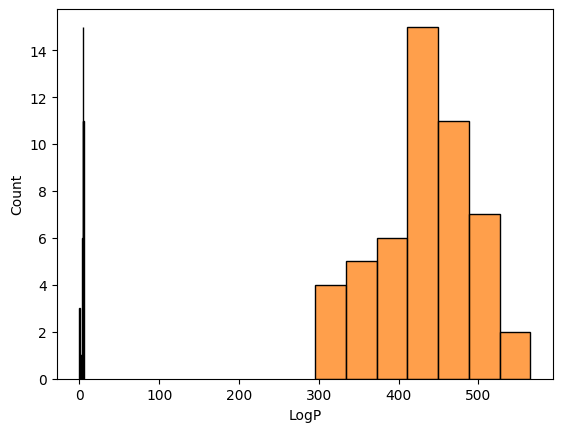

In [120]:
# Eamine chemical properties, docking score, affinity, physical properties, etc. distributions
import seaborn as sns
ax = sns.histplot(x=df_2['LogP']) 
